# 1) Delivery_time -> Predict delivery time using sorting time 

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
Delivery_time=pd.read_csv("C:\\Users\\Anjana\\Downloads\\delivery_time.csv")

In [4]:
Delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
Delivery_time.info() #NO MISSING VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
Delivery_time.duplicated()  #no duplicate values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

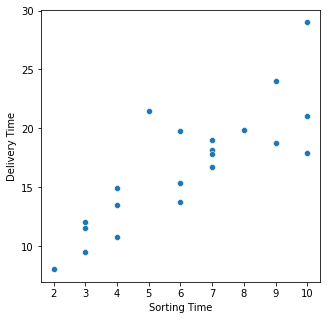

In [7]:
#visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=Delivery_time,palette='set1')

(array([[0., 0., 2., 3., 4., 4., 4., 2., 1., 1.],
        [7., 8., 6., 0., 0., 0., 0., 0., 0., 0.]]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ]),
 <a list of 2 BarContainer objects>)

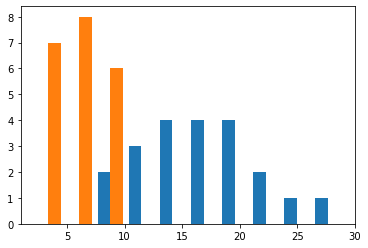

In [8]:
plt.hist(Delivery_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a344f14c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1a344f262e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a344f14940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a344f267c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a344f26a90>],
 'means': []}

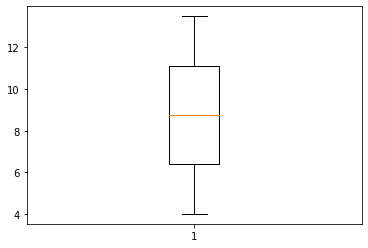

In [9]:
plt.boxplot(Delivery_time.iloc[1]) #nooutliers in the data

{'whiskers': [<matplotlib.lines.Line2D at 0x1a344f81460>,
 'caps': [<matplotlib.lines.Line2D at 0x1a344f81a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a344f81190>],
 'medians': [<matplotlib.lines.Line2D at 0x1a344f81fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a344f8d2b0>],
 'means': []}

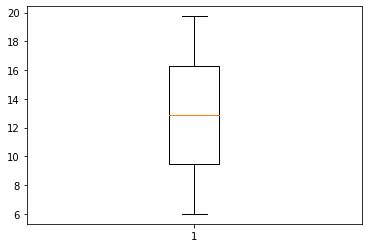

In [10]:
plt.boxplot(Delivery_time.iloc[2])#no outliers

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

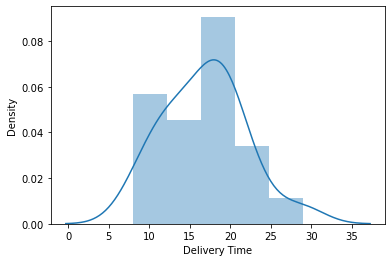

In [11]:
sns.distplot(Delivery_time['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

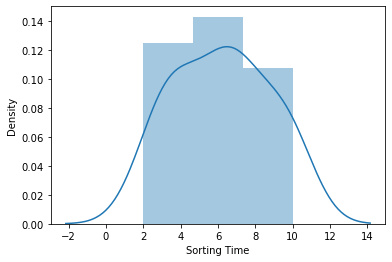

In [12]:
sns.distplot(Delivery_time['Sorting Time'])

In [13]:
Delivery_time.corr() #0.826

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [14]:
Delivery_time.columns=["deliverytime","sortingtime"]

<AxesSubplot:xlabel='sortingtime', ylabel='deliverytime'>

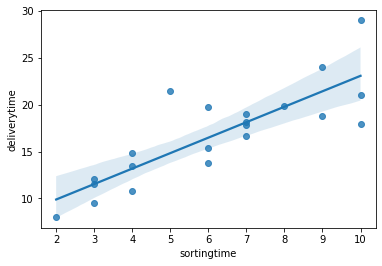

In [15]:
sns.regplot(x="sortingtime",y="deliverytime",data=Delivery_time)

In [16]:
import statsmodels.formula.api as smf# importing stats module

In [17]:
# Transforming variables for accuracy

In [18]:
import numpy as np

In [19]:
Delivery_time['st_sq']=Delivery_time.sortingtime**2
Delivery_time['st_sqrt']=Delivery_time.sortingtime**0.5
Delivery_time['st_log']=np.log(Delivery_time.sortingtime)
Delivery_time['st_sqrt4']=Delivery_time.sortingtime**0.4

In [20]:
Delivery_time

,deliverytime,sortingtime,st_sq,st_sqrt,st_log,st_sqrt4
0,21.00,10,100,3.162278,2.302585,2.511886
1,13.50,4,16,2.000000,1.386294,1.741101
2,19.75,6,36,2.449490,1.791759,2.047673
3,24.00,9,81,3.000000,2.197225,2.408225
4,29.00,10,100,3.162278,2.302585,2.511886
5,15.35,6,36,2.449490,1.791759,2.047673
6,19.00,7,49,2.645751,1.945910,2.177906
7,9.50,3,9,1.732051,1.098612,1.551846
8,17.90,10,100,3.162278,2.302585,2.511886
9,18.75,9,81,3.000000,2.197225,2.408225


In [21]:
Delivery_time.corr()

,deliverytime,sortingtime,st_sq,st_sqrt,st_log,st_sqrt4
deliverytime,1.000000,0.825997,0.793906,0.834150,0.833933,0.834847
sortingtime,0.825997,1.000000,0.983967,0.994704,0.977447,0.992266
st_sq,0.793906,0.983967,1.000000,0.960816,0.925659,0.954766
st_sqrt,0.834150,0.994704,0.960816,1.000000,0.993904,0.999768
st_log,0.833933,0.977447,0.925659,0.993904,1.000000,0.996045
st_sqrt4,0.834847,0.992266,0.954766,0.999768,0.996045,1.000000


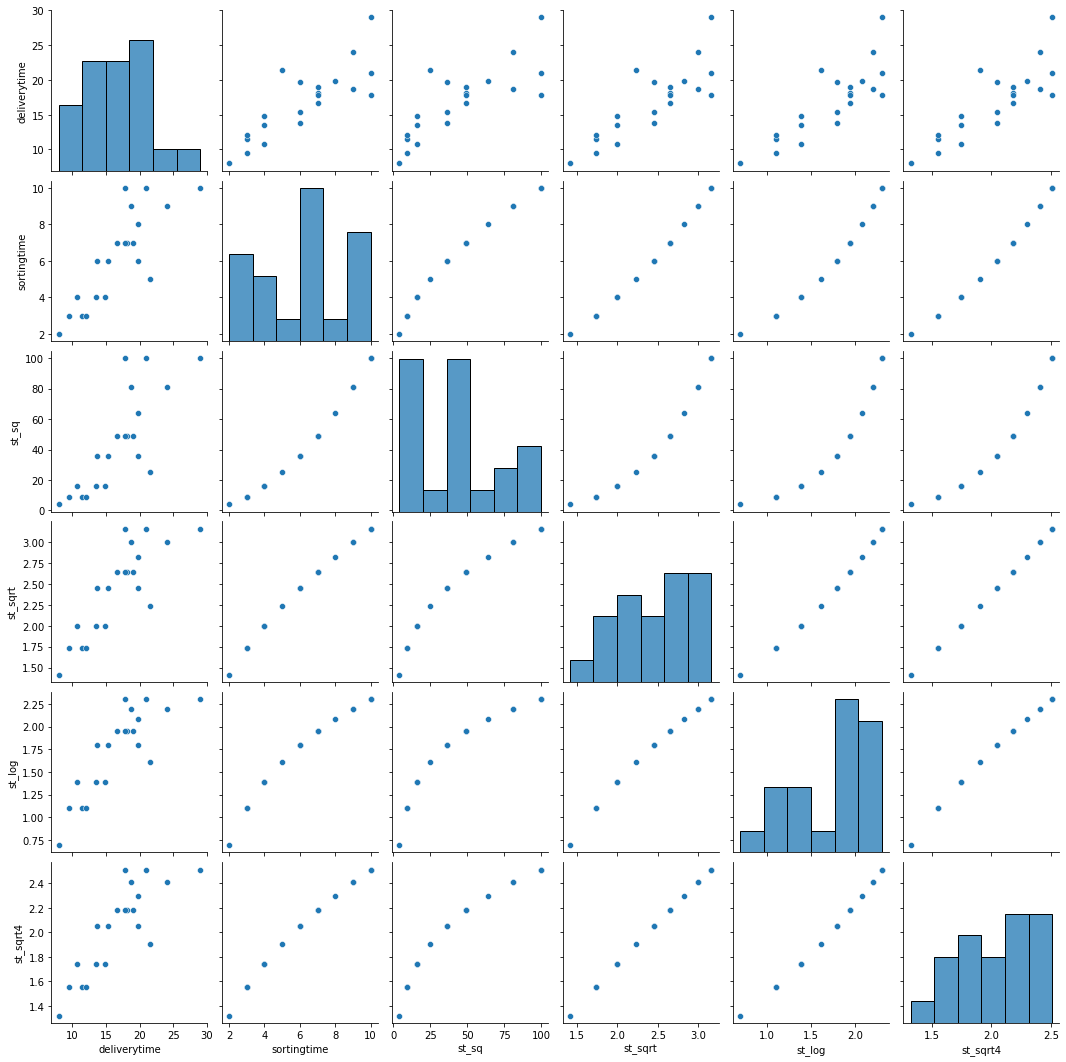

In [22]:
sns.pairplot(Delivery_time)

In [23]:
#Delivery_time['st_sqrt4']=Delivery_time.sortingtime**0.4 ,transformation shows more correlation

<AxesSubplot:xlabel='st_sqrt4', ylabel='Density'>

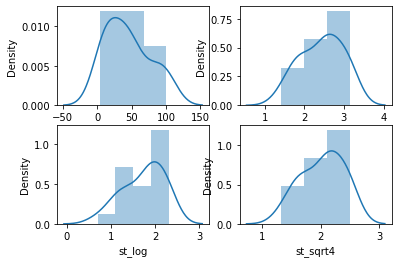

In [24]:
fig,axs=plt.subplots(2,2)
sns.distplot(Delivery_time['st_sq'],ax=axs[0,0])
sns.distplot(Delivery_time['st_sqrt'],ax=axs[0,1])
sns.distplot(Delivery_time['st_log'],ax=axs[1,0])
sns.distplot(Delivery_time['st_sqrt4'],ax=axs[1,1])


In [25]:
#MODEL MAKING

In [26]:
MODEL=smf.ols("deliverytime~sortingtime",data=Delivery_time).fit()
MODEL_SQ=smf.ols("deliverytime~st_sq",data=Delivery_time).fit()
MODEL_SQRT=smf.ols("deliverytime~st_sqrt",data=Delivery_time).fit()
MODEL_LOG=smf.ols("deliverytime~st_log",data=Delivery_time).fit()
MODEL_SQRT4=smf.ols("deliverytime~st_sqrt4",data=Delivery_time).fit()

In [27]:
#rsquared values of untransformed and transformed models
print("RSQUARED VALUE OF MODEL:",MODEL.rsquared)
print("RSQUARED VALUE OF MODEL_SQ:",MODEL_SQ.rsquared)
print("RSQUARED VALUE OF MODEL_SQRT:",MODEL_SQRT.rsquared)
print("RSQUARED VALUE OF MODEL_LOG:",MODEL_LOG.rsquared)
print("RSQUARED VALUE OF MODEL_SQRT4:",MODEL_SQRT4.rsquared)

RSQUARED VALUE OF MODEL: 0.6822714748417231
RSQUARED VALUE OF MODEL_SQ: 0.6302871815826637
RSQUARED VALUE OF MODEL_SQRT: 0.695806227630867
RSQUARED VALUE OF MODEL_LOG: 0.6954434611324223
RSQUARED VALUE OF MODEL_SQRT4: 0.6969691412160728


In [28]:
#MODEL_SQRT4 HAS LARGE RSQUARED VALUE ,SO IT IS THE BEST MODEL 

In [29]:
MODEL_SQRT4.params

Intercept    -7.050883
st_sqrt4     11.751321
dtype: float64

In [30]:
MODEL_SQRT4.tvalues

Intercept   -1.926237
st_sqrt4     6.610589
dtype: float64

In [31]:
MODEL_SQRT4.pvalues

Intercept    0.069169
st_sqrt4     0.000003
dtype: float64

In [32]:
MODEL_SQRT4.resid

0    -1.467100
1     0.090645
2     2.738026
3     2.751062
4     6.532900
5    -1.661974
6     0.457606
7    -1.685352
8    -4.567100
9    -2.498938
10   -0.116563
11   -2.659355
12   -1.862394
13    0.314648
14    0.844648
15    1.470645
16   -3.261974
17   -0.432394
18   -0.455078
19   -0.712394
20    6.180435
dtype: float64

In [33]:
Delivery_time["PREDICTED"]=MODEL_SQRT4.fittedvalues

In [34]:
Delivery_time

,deliverytime,sortingtime,st_sq,st_sqrt,st_log,st_sqrt4,PREDICTED
0,21.00,10,100,3.162278,2.302585,2.511886,22.467100
1,13.50,4,16,2.000000,1.386294,1.741101,13.409355
2,19.75,6,36,2.449490,1.791759,2.047673,17.011974
3,24.00,9,81,3.000000,2.197225,2.408225,21.248938
4,29.00,10,100,3.162278,2.302585,2.511886,22.467100
5,15.35,6,36,2.449490,1.791759,2.047673,17.011974
6,19.00,7,49,2.645751,1.945910,2.177906,18.542394
7,9.50,3,9,1.732051,1.098612,1.551846,11.185352
8,17.90,10,100,3.162278,2.302585,2.511886,22.467100
9,18.75,9,81,3.000000,2.197225,2.408225,21.248938


In [35]:
#predicting  new values

In [36]:
NEW=pd.DataFrame({"sortingtime":[6,5]})
NEW["st_sqrt4"]=NEW.sortingtime**0.4
NEW

,sortingtime,st_sqrt4
0,6,2.047673
1,5,1.903654


In [37]:
NEW['PREDICTED']=MODEL_SQRT4.predict(NEW)
NEW

,sortingtime,st_sqrt4,PREDICTED
0,6,2.047673,17.011974
1,5,1.903654,15.319565
